In [45]:
import cv2
import skimage
import numpy as np
from skimage.transform import resize
from skimage import io


#own library.
from retinaSeg import retinahelpfunction as rhf
from retinaSeg import retinapreprocess as rpp

In [106]:
def luminosity_contrast_normalization(img,blockSize,resizeImg,debugOption = 'off'):
    """
    Luminosity and contrast normalization in retinal images
        Marco Foracchia 1, Enrico Grisan, Alfredo Ruggeri
        Department of Information Engineering, University of Padova, Via Gradenigo 6/a, 35131 Padova, Italy
        Medical Image Analysis
    
    Parameters
    ----------
    img : 2-D Array 
        *img range = [0,1]*
        numpy 2-D array
        opencv / sklearn / numpy are avaliable.
        float / uint8 data type.
        
    blockSizeR : block size. (2-D array)
        
    resizeImg : col * row (2-D array)
    
    debugOption : debugging option
    if you turn on the this variable, you can see the process of images.
        
    Returns
    -------
        normalized image.
    
    Example
    -------
    >>> vesselPath4 = "./data/18.06.25/Image__2018-06-25__15-23-15.bmp"
    >>> vesselImg = io.imread(vesselPath4)
    >>> vesselImg = vesselImg[:,:,1]
    >>> resizedVal = (800,1300)
    >>> blockSize = (80,130)
    >>> result = luminosity_contrast_normalization(vesselImg,blockSize,resizedVal)
    
    """
    resizedImg  = resize(img, resizeImg , anti_aliasing=True)
    rhf.show_on_jupyter(resizedImg,'gray','float')
    
    blockR,blockC = blockSize
    imgR, imgC  = resizedImg.shape
    
    meanSub= np.zeros(( int(imgR / blockR), int(imgC/blockC) ))
    stdSub = np.zeros((int(imgR / blockR), int(imgC/blockC)))

    
    for i in range(int(imgR / blockR)): # Row
        for j in range(int(imgC / blockC)): # Col
            topLeftC = blockC * j +1 
            topLeftR = blockR * i +1
            tempH = blockR * (i+1)
            tempW = blockC * (j+1)
            temp = resizedImg[topLeftR:tempH, topLeftC:tempW]
            meanSub[i,j] = np.mean(temp)
            stdSub[i,j] = np.std(temp)
    
    meanFull = cv2.resize(meanSub,(1300,800),interpolation = cv2.INTER_CUBIC)
    stdFull = cv2.resize(stdSub,(1300,800),interpolation = cv2.INTER_CUBIC)
    
    mahDist = np.divide(np.subtract(resizedImg,meanFull) , stdFull)
    mahDist = np.abs(mahDist)
    mahDist[mahDist < 1] = 1
    mahDist[mahDist != 1] = 0
    
    if debugOption == 'on':
        rhf.show_on_jupyter(meanFull,'gray','float')
        rhf.show_on_jupyter(stdFull,'gray','float')
        rhf.show_on_jupyter(mahDist,'gray','float')
    
    meanSub2= np.zeros(( int(imgR / blockR), int(imgC/blockC) ))
    stdSub2 = np.zeros((int(imgR / blockR), int(imgC/blockC)))
    
    for i in range(int(imgR / blockR)): # Row
        for j in range(int(imgC / blockC)): # Col
            topLeftC2 = blockC * j +1 
            topLeftR2 = blockR * i +1
            tempH2 = blockR * (i+1)
            tempW2 = blockC * (j+1)
            temp2 = resizedImg[topLeftR2:tempH2, topLeftC2:tempW2]
            temp3 = np.ndarray.flatten(temp2)
            tempDist = mahDist[topLeftR2:tempH2, topLeftC2:tempW2]
            tempDist = np.nonzero(np.ravel(tempDist))
            meanSub2[i,j] = np.mean(temp3[tempDist])
            stdSub2[i,j] = np.std(temp3[tempDist])
            
            
            
    meanFull2 = cv2.resize(meanSub2,(1300,800),interpolation = cv2.INTER_CUBIC)
    stdFull2 = cv2.resize(stdSub2,(1300,800),interpolation = cv2.INTER_CUBIC)
    corrected = (np.divide(np.subtract(resizedImg,meanFull2),stdFull2))
    
    if debugOption == 'on':
        rhf.show_on_jupyter(meanFull2,'gray','float')
        rhf.show_on_jupyter(stdFull2,'gray','float')
        rhf.show_on_jupyter(corrected,'gray','float')
    
    return corrected

(784, 1323)


/Users/hyeonwoojeong/.pyenv/versions/3.5.5/envs/bonoProjects/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


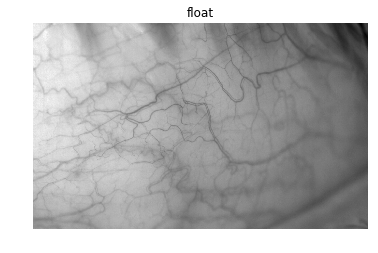

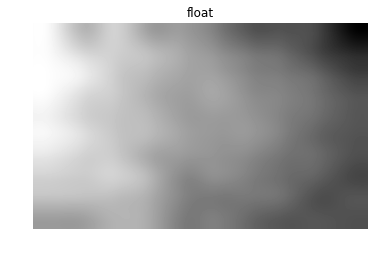

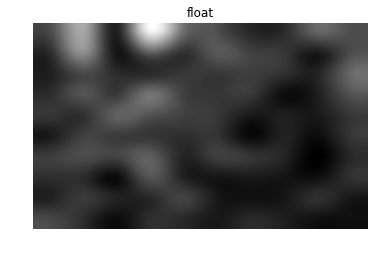

[[3.76488965e-01 2.21132278e-01 5.21576680e-01 ... 1.37240413e+00
  1.37443254e+00 1.28884736e+00]
 [6.75194221e-01 3.83536871e-01 1.60390337e-03 ... 1.43589441e+00
  1.43796652e+00 1.50883987e+00]
 [5.07448184e-01 1.43610621e-01 1.97836025e-01 ... 1.36934920e+00
  1.36455823e+00 1.44032188e+00]
 ...
 [1.19693725e-02 4.64296131e-01 1.70624579e-01 ... 2.91470737e+00
  2.56600406e+00 2.91970047e+00]
 [1.61833819e-01 2.44600689e-01 8.18757413e-02 ... 3.15293877e+00
  2.95040804e+00 2.94086107e+00]
 [1.40958617e-01 4.50148468e-01 1.30562149e-01 ... 4.05238433e+00
  3.86830503e+00 3.67583639e+00]]


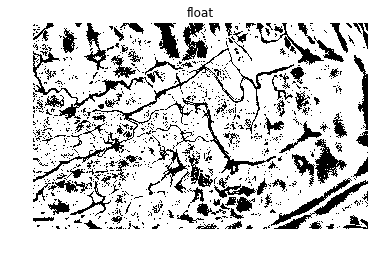

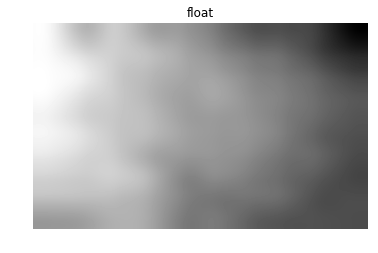

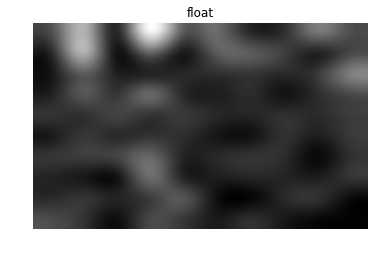

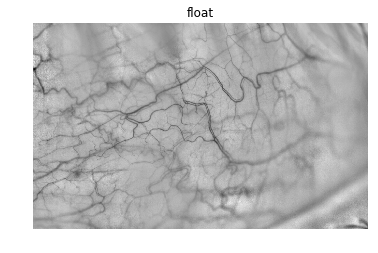

In [108]:
vesselPath4 = "./data/18.06.25/Image__2018-06-25__15-23-15.bmp"

vesselImg = io.imread(vesselPath4)
vesselImg = vesselImg[:,:,1]
resizedVal = (800,1300)
blockSize = (80,130)
result = luminosity_contrast_normalization(vesselImg,blockSize,resizedVal)